In [1]:
%pylab inline
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [35]:
def weightedAverage(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

In [36]:
def readGrayScale(image):
    grey = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
    # get row number
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
            grey[rownum][colnum] = weightedAverage(image[rownum][colnum])
    return grey

In [38]:
R_color = imread('./Images/ReferenceImage.jpg')
N_color = imread('./Images/NewImage.jpg')

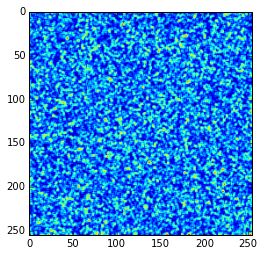

In [39]:
imshow(R_color)

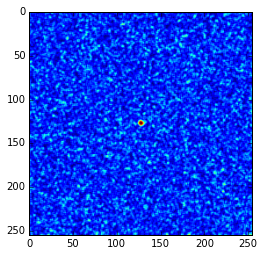

In [40]:
imshow(N_color)

In [41]:
beta = -0.00477517
sigma_r = 100
sigma_n = 100
epsilon = 0.01

In [42]:
R = R_color #There are not RGB images in this case
N = N_color

mean = 0
row_r, col_r = R.shape
row_n, col_n = N.shape
# We are not how to represent the PSF used. 
PSF_r = np.random.normal(mean, 3, (row_r,col_r))
PSF_n = np.random.normal(mean, 3, (row_n,col_n))

In [43]:
fourier_R = np.fft.fft2(R)
fourier_N = np.fft.fft2(N)
fourier_PSF_r = np.fft.fft2(PSF_r)
fourier_PSF_n = np.fft.fft2(PSF_n)

In [44]:
# Fs are assigned as the article suggests
F_r = 1
F_n = beta

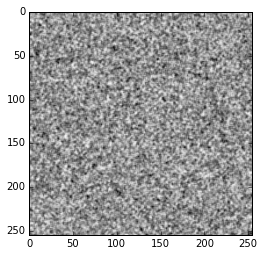

In [46]:
#Finds S
denom = (sigma_r**2.0)*(F_n**2.0)*(fourier_PSF_n*np.conjugate(fourier_PSF_n)) 
denom = denom + (sigma_n**2)*(F_r**2)*(fourier_PSF_r*np.conjugate(fourier_PSF_r)) + epsilon
                               
fourier_S = (F_n)*(F_r**2)*np.conjugate(fourier_PSF_n)*(fourier_PSF_r*np.conjugate(fourier_PSF_r))*fourier_N
fourier_S = fourier_S - (F_r)*(F_n**2)*conjugate(fourier_PSF_r)*(fourier_PSF_n*np.conjugate(fourier_PSF_n))*fourier_R
fourier_S = fourier_S/denom
S = np.fft.ifft2(fourier_S)
plt.imshow(np.real(S), cmap="Greys_r")

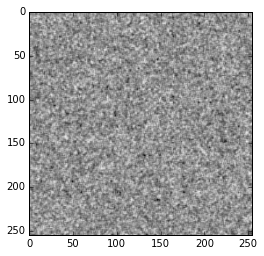

In [62]:
plt.imshow(np.imag(S), cmap="Greys_r")

In [65]:
real_S = np.real(S)
imag_S = np.imag(S)

In [66]:
s_real_1D = real_S.ravel()
s_imag_1D = imag_S.ravel()

(array([  6.50240000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0.        ,  0.00112432,  0.00224865,  0.00337297,  0.0044973 ,
         0.00562162,  0.00674595,  0.00787027,  0.0089946 ,  0.01011892,
         0.01124325]),
 <a list of 10 Patch objects>)

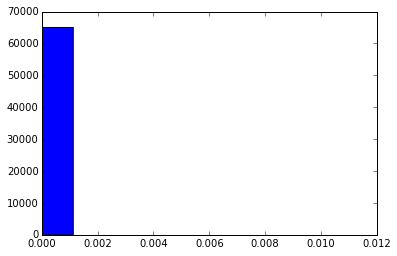

In [68]:
plt.hist(s_real_1D)

In [71]:
max_S_real = np.max(real_S)
max_S_real_arg = np.argmax(real_S)
print max_S_real, max_S_real_arg

0.0112432490912 48715


(array([  1.40000000e+01,   1.54000000e+02,   1.70300000e+03,
          1.00860000e+04,   2.62360000e+04,   2.09540000e+04,
          5.23100000e+03,   5.96000000e+02,   4.80000000e+01,
          3.00000000e+00]),
 array([ -1.22983646e-16,  -9.73505380e-17,  -7.17174298e-17,
         -4.60843216e-17,  -2.04512135e-17,   5.18189472e-18,
          3.08150029e-17,   5.64481110e-17,   8.20812192e-17,
          1.07714327e-16,   1.33347436e-16]),
 <a list of 10 Patch objects>)

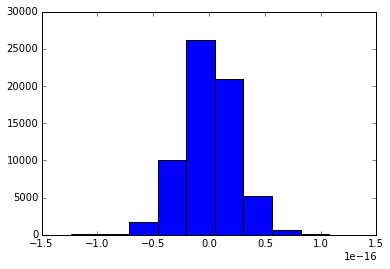

In [69]:
plt.hist(s_imag_1D)

In [49]:
maximum_S = amax(np.real(S))
print(maximum_S)
for i in range(len(S)):
    for j in range(len(S)):
        if np.real(S)[i][j] == maximum_S:
            print(i)
            print(j)
        else:
            np.real(S)[i][j] = 0

0.0112432490912
191
10
